## LangChain (LangGraph) Modules and Components

### Set API Keys as enviroment variable

In [11]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

In [3]:
_set_env("AVALAI_API_KEY")

In [2]:
_set_env("GOOGLE_API_KEY")

### Chat Models

In [5]:
import os
from langchain_openai import ChatOpenAI

AVALAI_BASE_URL = "https://api.avalai.ir/v1"
GPT_MODEL_NAME = "gpt-4o-mini"

gpt4o_chat = ChatOpenAI(model=GPT_MODEL_NAME,
                        base_url=AVALAI_BASE_URL,
                        api_key=os.environ["AVALAI_API_KEY"])

TOGETHER_AI_BASE_URL = "https://api.together.xyz/v1"
llama3_3_chat = ChatOpenAI(
    model="meta-llama/Llama-3.3-70B-Instruct-Turbo",
    base_url=TOGETHER_AI_BASE_URL,
    api_key=os.environ["TOGETHERAI_API_KEY"]
)

In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
GEMINI_MODEL_NAME = "gemini-1.5-flash"
gemini_chat = ChatGoogleGenerativeAI(model=GEMINI_MODEL_NAME)

/Users/miladmohammadi/Documents/NLP 6/NLP_CA6_Solutions/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Messages

In [31]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage("You are a helpful assistant AI assistant."),
    HumanMessage("Hello, I am Milad. Who are you?"),
]

### Model Invoke

In [32]:
response = gpt4o_chat.invoke(messages)
response

AIMessage(content='Hello, Milad! I’m an AI assistant here to help you with any questions or information you need. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 30, 'total_tokens': 60, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_d02d531b47', 'finish_reason': 'stop', 'logprobs': None}, id='run-91758f76-82c2-4f1d-9005-9029e7308590-0', usage_metadata={'input_tokens': 30, 'output_tokens': 30, 'total_tokens': 60, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [33]:
response.pretty_print()

================================== Ai Message ==================================

Hello, Milad! I’m an AI assistant here to help you with any questions or information you need. How can I assist you today?


In [34]:
messages = [
    {
        "role": "system",
        "content": "You are a helpful assistant AI assistant."  
    },
    {
        "role": "user",
        "content": "Hello, My name is Milad. How are you?",
    },
    {
        "role": "assistant",
        "content": "Hello Milad, I'm doing well, thank you for asking.",
    },
    {
        "role": "user",
        "content": "Can you tell me a joke?",
    }
]

In [35]:
response = gpt4o_chat.invoke(messages)
response

AIMessage(content='Sure! Here’s one for you:\n\nWhy don’t skeletons fight each other?\n\nBecause they don’t have the guts!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 59, 'total_tokens': 85, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_d02d531b47', 'finish_reason': 'stop', 'logprobs': None}, id='run-249a99b3-0261-4a03-b078-73c7bd5504bd-0', usage_metadata={'input_tokens': 59, 'output_tokens': 26, 'total_tokens': 85, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [36]:
response.pretty_print()

================================== Ai Message ==================================

Sure! Here’s one for you:

Why don’t skeletons fight each other?

Because they don’t have the guts!


In [6]:
response = gemini_chat.invoke("Hello, I am a CS student. Who are you?")
response

AIMessage(content="I am a large language model, trained by Google.  I'm a computer program designed to process information and respond to a wide range of prompts and questions in a human-like way.  Think of me as a sophisticated text-based AI assistant.  I don't have a name, feelings, or personal experiences like a human being.  I exist solely as a computer program.\n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-2d267e2a-7948-4021-beab-db87b676867c-0', usage_metadata={'input_tokens': 13, 'output_tokens': 81, 'total_tokens': 94, 'input_token_details': {'cache_read': 0}})

In [7]:
response.pretty_print()

================================== Ai Message ==================================

I am a large language model, trained by Google.  I'm a computer program designed to process information and respond to a wide range of prompts and questions in a human-like way.  Think of me as a sophisticated text-based AI assistant.  I don't have a name, feelings, or personal experiences like a human being.  I exist solely as a computer program.


In [8]:
response = llama3_3_chat.invoke("Hello, I am Milad. Who are you?")
response.pretty_print()

================================== Ai Message ==================================

Hello Milad, I'm an artificial intelligence model known as Llama. Llama stands for "Large Language Model Meta AI."


### Structured Output

In [11]:
from typing import Optional
from pydantic import BaseModel, Field

class Joke(BaseModel):
    setup: str = Field(description="The setup of the joke")
    punchline: str = Field(description="The punchline to the joke")
    rating: Optional[int] = Field(description="How funny the joke is, from 1 to 10")

In [15]:
structured_llm = llama3_3_chat.with_structured_output(Joke)

In [16]:
response = structured_llm.invoke("Tell me a joke about cats")
response

Joke(setup='Why did the cat join a band?', punchline='Because it wanted to be the purr-cussionist!', rating=8)

In [17]:
response.rating

8

### Tavily (Search) API

In [18]:
from langchain_community.tools.tavily_search import TavilySearchResults

query = "How to make a cake"
searcher = TavilySearchResults(max_results=3).invoke(query)
searcher

[{'url': 'https://www.wikihow.com/Make-a-Plain-Cake',
  'content': "Reader Success Stories\nFavour Michael\nAug 10, 2021\nDid this article help you?\nFavour Michael\nAug 10, 2021\nSamantha Nguyen\nJun 6, 2021\nRukayyat Ilori\nJul 20, 2018\nMinnie\nOct 10, 2021\nNaomi Mechumo\nDec 8, 2022\nQuizzes\nYou Might Also Like\nFeatured Articles\nTrending Articles\nFeatured Articles\n Tips\nThings You'll Need\nYou Might Also Like\nReferences\nAbout This Article\nTo make a plain and simple cake, start by whisking flour, baking powder, and salt in a large bowl. Log in\nHow to Bake a Simple, Plain Cake from Scratch\nLast Updated: December 31, 2023\nFact Checked\nThis article was co-authored by Quynh La and by wikiHow staff writer, Janice Tieperman. Ingredients\nMakes one 9\xa0in (23\xa0cm) square cake\nSteps\nPreheat the oven to 350 °F and grease the pan.\n Featured Articles\nWatch Articles\nTrending Articles\nFollow Us\nDon’t miss out!"},
 {'url': 'https://www.foodnetwork.com/how-to/articles/how-t

## Simple Chain/Router

In [19]:
from typing import TypedDict, Optional

class MyState(TypedDict):
    user_query: str
    rewritten_query: Optional[str]
    search_results: Optional[str]
    final_answer: Optional[str]

In [20]:
def node_query_rewrite(state: MyState) -> MyState:
    """
    Rewrites the user's query using an LLM for clarity or correctness.
    """
    print("---Node Query Rewrite---")
    user_query = state["user_query"]
    
    rewrite_prompt = f"Please rewrite this query suitable for search engines:\n\n{user_query}"
    # Invoke the LLM to rewrite the query
    rewritten = gpt4o_chat.invoke(rewrite_prompt).content
    print("Rewritten query:", rewritten)
    state["rewritten_query"] = rewritten
    return state

def node_search_internet(state: MyState) -> MyState:
    """
    Searches the internet for the rewritten query using a search tool.
    """
    print("---Node Search Internet---")
    rewritten_query = state["rewritten_query"]
    
    # Use your search tool function
    results = TavilySearchResults(max_results=3).invoke(rewritten_query)
    print("Search results:")
    print(results)
    # Save the search results in state
    state["search_results"] = str(results)
    return state

def node_generate_answer(state: MyState) -> MyState:
    """
    Generates a final answer based on the original user query and the search results.
    """
    print("---Node Generate Answer---")
    user_query = state["user_query"]
    search_info = state["search_results"] or "No search results found."
    
    # Combine user query with search results to generate answer
    final_answer = gpt4o_chat.invoke(
        f"User's query: {user_query}\n\nSearch results:\n{search_info}\n\n"
        "Please provide a helpful answer."
    )
    print("Final answer:", final_answer.content)
    state["final_answer"] = final_answer.content
    return state

In [24]:
from pydantic import BaseModel, Field

class IsRelated(BaseModel):
    reasoning : str = Field(description="The reasoning behind the decision, wheather it is the query is related to baking and cooking or not.")
    is_related_flag: bool = Field(description="The decision whether the query is related to baking and cooking or not.")


from typing import Literal

def is_related(MyState) -> Literal["node_query_rewrite", "node_generate_answer"]:
    query = MyState["user_query"]
    llm_with_structured_output = gpt4o_chat.with_structured_output(IsRelated)
    response = llm_with_structured_output.invoke(query)
    print("-----Is Related-----")
    print(response)
    if response.is_related_flag == True:
        return "node_query_rewrite"
    else:
        return "node_generate_answer"

In [25]:
from langgraph.graph import StateGraph, START, END

# Build the graph
builder = StateGraph(MyState)

# Add nodes
builder.add_node("node_query_rewrite", node_query_rewrite)
builder.add_node("node_search_internet", node_search_internet)
builder.add_node("node_generate_answer", node_generate_answer)

# Add edges (linear flow)
builder.add_conditional_edges(START, is_related)

builder.add_edge("node_query_rewrite", "node_search_internet")
builder.add_edge("node_search_internet", "node_generate_answer")
builder.add_edge("node_generate_answer", END)

# Compile the graph
advanced_search_graph = builder.compile()


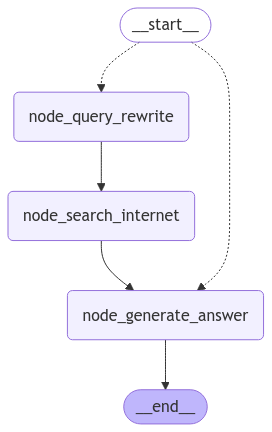

In [26]:
from IPython.display import Image, display
display(Image(advanced_search_graph.get_graph().draw_mermaid_png()))


In [27]:
# Provide the user’s query to the graph
user_input = {"user_query": "I'am new to baking, How to bake a chocolate cake?"}

final_state = advanced_search_graph.invoke(user_input)

-----Is Related-----
reasoning='The query is about baking a chocolate cake, which directly relates to baking and cooking.' is_related_flag=True
---Node Query Rewrite---
Rewritten query: "Beginner's guide to baking a chocolate cake: step-by-step instructions"
---Node Search Internet---
Search results:
[{'url': 'https://www.bhg.com/recipes/how-to/bake/how-to-make-chocolate-cake/', 'content': "More Great Chocolate Cake Ideas\nMore Craveable Chocolate Cake Recipes\nBy clicking “Accept All Cookies”, you agree to the storing of cookies on your device to enhance site navigation, analyze site usage, and assist in our marketing efforts. Here's Our Step-By-Step Guide\nHomemade chocolate cake is a piece of—well, you know—with the help of one of our best chocolate cake recipes.\n Learn how to make a cake from scratch in a matter of minutes with our easy chocolate cake recipes that'll get raves from your guests.\n Bake in preheated oven for 30 to 35 minutes for 9-inch pans, 35 to 40 minutes for 13-

In [28]:
final_state

{'user_query': "I'am new to baking, How to bake a chocolate cake?",
 'rewritten_query': '"Beginner\'s guide to baking a chocolate cake: step-by-step instructions"',
 'search_results': '[{\'url\': \'https://www.bhg.com/recipes/how-to/bake/how-to-make-chocolate-cake/\', \'content\': "More Great Chocolate Cake Ideas\\nMore Craveable Chocolate Cake Recipes\\nBy clicking “Accept All Cookies”, you agree to the storing of cookies on your device to enhance site navigation, analyze site usage, and assist in our marketing efforts. Here\'s Our Step-By-Step Guide\\nHomemade chocolate cake is a piece of—well, you know—with the help of one of our best chocolate cake recipes.\\n Learn how to make a cake from scratch in a matter of minutes with our easy chocolate cake recipes that\'ll get raves from your guests.\\n Bake in preheated oven for 30 to 35 minutes for 9-inch pans, 35 to 40 minutes for 13-inch pans, or until a wooden toothpick inserted comes out clean. Ingredients for Chocolate Cake\\nStep 1

In [29]:
final_state['final_answer']

"Welcome to the world of baking! Here's a simple step-by-step guide to help you bake a delicious chocolate cake:\n\n### Ingredients:\n- **1 and 3/4 cups** all-purpose flour\n- **3/4 cup** unsweetened cocoa powder\n- **2 cups** granulated sugar\n- **1 and 1/2 teaspoons** baking powder\n- **1 and 1/2 teaspoons** baking soda\n- **1 teaspoon** salt\n- **2 large** eggs\n- **1 cup** whole milk\n- **1/2 cup** vegetable oil\n- **2 teaspoons** vanilla extract\n- **1 cup** boiling water\n\n### Instructions:\n\n1. **Preheat Your Oven:**\n   Preheat your oven to 350°F (175°C). Grease and flour two 9-inch round cake pans.\n\n2. **Prepare Your Ingredients:**\n   Allow your eggs and milk to come to room temperature for about 30 minutes. This helps them mix better into the batter.\n\n3. **Mix Dry Ingredients:**\n   In a large mixing bowl, combine the flour, cocoa powder, sugar, baking powder, baking soda, and salt. Mix these dry ingredients together until well combined.\n\n4. **Add Wet Ingredients:**\